#RNN (Recurrent Neural Network)
While standard neural networks pass information in one direction i.e. from input to output, RNNs feed information back into the network at each step.

In a traditional neural network (like a feedforward or CNN), all inputs are independent — the model treats each input separately.
However, in language or sequential data, the meaning of a word often depends on previous words in the sequence.

That’s where RNNs come in.

RNNs have a loop (recurrence) that allows information to persist from one step of the sequence to the next.

Input Layer

This layer takes the input sequence data.

1. In NLP, each word (or token) in a sentence is usually converted into a vector (like a one-hot encoding or embedding).
              
              Example: I love dogs
              x1= I, x2= love , x3 = dogs
    Each of these word vectors is fed into the RNN one at a time, step by step.

2.  Hidden Layer (Recurrent Layer) — 💡 the heart of the RNN This is where the “memory” or “context” of the sequence is maintained.

            At each time step t:
            RNN receives input x(t)
            previous hidden state h(t-1)
            Then it computes new hidden state h(t) = f(W(x)*X(t) +W(h)*h(t-1) +b)

            W(x) = Weight Matrix for Input
            W(h) = Weight Matrix for Hidden state
            b = Bias
            f = Activation function (tanh or relu)

3. Output: Produces the final prediction

          y(t) = g(W(y)* h(t) + c)

          W(y) = Weight Matrix of mapping hidden state to output
          c = bias
          g = activation function (softmax or other)

⚙️ Additional Components (Optional but Common)

In practice, RNNs often include:

Embedding Layer: Converts words into dense vector representations.

Dropout Layer: Prevents overfitting by randomly dropping units.

LSTM/GRU Gates: Enhanced mechanisms to control what information to keep or forget (solving the vanishing gradient problem).

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np


In [ ]:
#Step 2: Define Text and Preprocess It

text = "This is GeeksforGeeks a software training institute"

# Convert text to lowercase for consistency
text = text.lower().split()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

print(text)

['this', 'is', 'geeksforgeeks', 'a', 'software', 'training', 'institute']


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding
print("Word index:", tokenizer.word_index)

Word index: {'this': 1, 'is': 2, 'geeksforgeeks': 3, 'a': 4, 'software': 5, 'training': 6, 'institute': 7}


#Step 3: Create Training Sequences

We’ll create sequences like:

[this] → is

[this, is] → geeksforgeeks

[this, is, geeksforgeeks] → a

and so on.

Our goal is to teach the RNN:

If it sees "This", predict "is"

If it sees "This is", predict "GeeksforGeeks"

If it sees "This is GeeksforGeeks", predict "a"
and so on.

In [ ]:

sequences = []

for i in range(1,len(text)): #iterating words by words in text which has 6 words and will create 6 sequences
  seq = text[:i+1] #Build Sequence Prograssively
  encoded = tokenizer.texts_to_sequences([' '.join(seq)])[0] #converting words into numbers
  print(encoded)
  sequences.append(encoded)


[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]


In [ ]:
max_len = max(len(seq) for seq in sequences)

#RNNs need inputs of equal length.
#Since our sequences have different lengths, we pad shorter ones with zeros at the beginning ('pre').
sequences = pad_sequences (sequences,max_len,padding='pre')
print(sequences)

[[0 0 0 0 0 1 2]
 [0 0 0 0 1 2 3]
 [0 0 0 1 2 3 4]
 [0 0 1 2 3 4 5]
 [0 1 2 3 4 5 6]
 [1 2 3 4 5 6 7]]


In [ ]:
sequences = np.array(sequences) #Even though sequences looks like an array (because it’s a list of lists), it’s actually still a Python list, not a NumPy array.
#TensorFlow models expect NumPy arrays (or tensors) — not plain Python lists — for numerical operations and training.

X = sequences[ :, : -1] #all words except the last one
Y = sequences[: , -1] # the last word (the next word to predict)
print(X,Y)

[[0 0 0 0 0 1]
 [0 0 0 0 1 2]
 [0 0 0 1 2 3]
 [0 0 1 2 3 4]
 [0 1 2 3 4 5]
 [1 2 3 4 5 6]] [2 3 4 5 6 7]


In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=10, input_length=max_len-1),
    SimpleRNN(50, activation='tanh'), #The number 50 means the RNN has 50 hidden units (neurons) in its hidden layer.
    Dense(vocab_size, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#Embedding converts word indices into dense numeric vectors

| Parameter                      | Meaning                                                                                                                                                         |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **input_dim = vocab_size**     | The total number of unique tokens in your vocabulary (so embedding table has one row per word).                                                                 |
| **output_dim = 10**            | The size (dimension) of each word’s embedding vector. You can think of this as how much information each word vector carries. Common values: 50, 100, 300, etc. |
| **input_length = max_len - 1** | The length of each input sequence (number of words fed into the RNN). Needed so Keras knows the input shape.                                                    |



| Word          | ID | Embedding (10D vector)        |
| ------------- | -- | ----------------------------- |
| this          | 1  | [0.21, -0.11, 0.35, …, 0.08]  |
| is            | 2  | [0.02, 0.99, -0.42, …, 0.01]  |
| geeksforgeeks | 3  | [-0.43, 0.22, 0.67, …, -0.10] |

#Input
[1, 2, 3, 4]

#Embedding layer output
[
 [0.21, -0.11, 0.35, ..., 0.08],  # "this"

 [0.02, 0.99, -0.42, ..., 0.01],  # "is"

 [-0.43, 0.22, 0.67, ..., -0.10], # "geeksforgeeks"

 [0.05, -0.61, 0.14, ..., 0.20]   # "a"
]


#RNN Layer such as SimpleRNN(5) (1 RNN layer with 5 hidden units (neurons))

Suppose we have 4 words: [x₁, x₂, x₃, x₄]
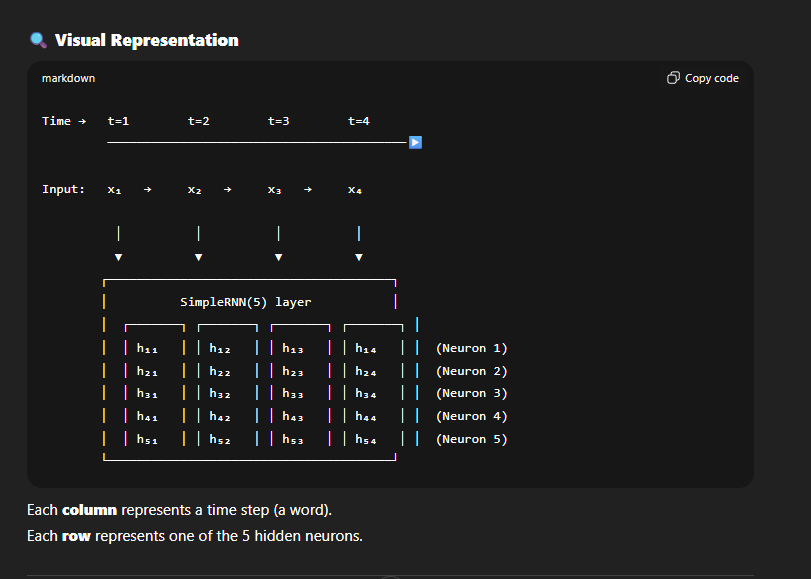

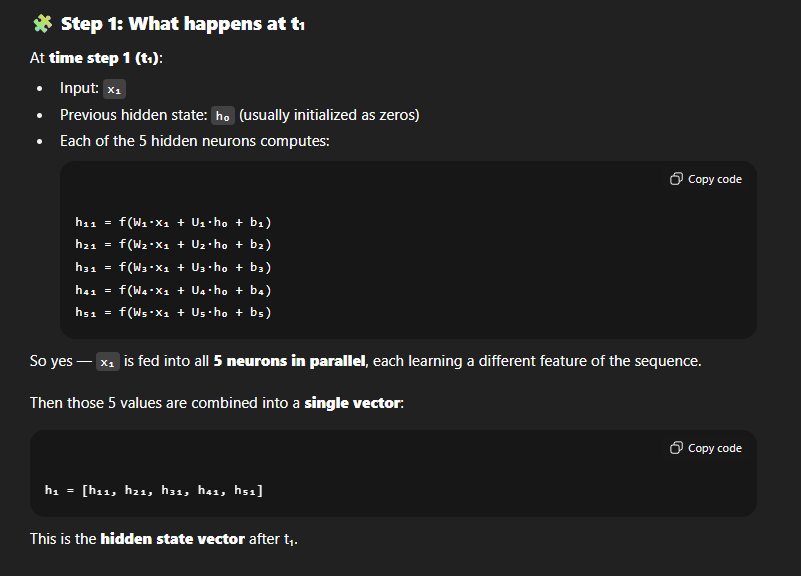
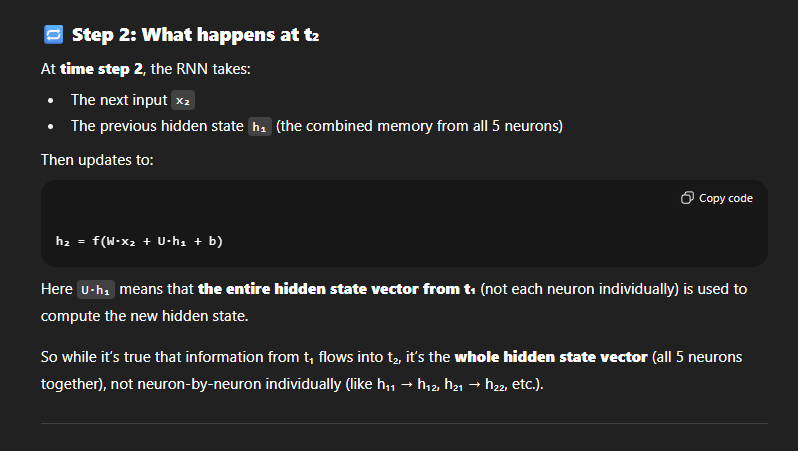
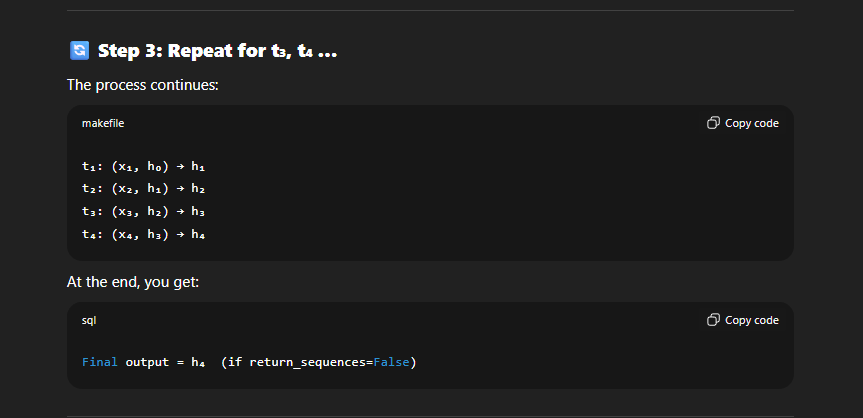

In [ ]:
model.fit(X,Y,epochs=40)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1667 - loss: 2.0579
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3333 - loss: 2.0407
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 2.0234
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 2.0057
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 1.9877
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6667 - loss: 1.9690
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6667 - loss: 1.9495
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 1.9292
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6667 - loss: 1.9079
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 1.8854
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8333 - loss: 1.8617
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8333 - loss: 1.8366
Epo

In [ ]:
seed_text = "this is geeksforgeeks a"
next_words = 1 # generate a few words

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += ' ' + word
            break

print("Generated text:", seed_text)


Generated text: this is geeksforgeeks a software
